In [35]:
import pycountry
import plotly.express as px
import pandas as pd
# probably don't need thisfrom covid import Covid
import covid19pandas as cod

In [37]:
df = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


In [38]:
df.head(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81000 entries, 0 to 80999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            81000 non-null  datetime64[ns]
 1   UID             81000 non-null  int64         
 2   iso2            80100 non-null  object        
 3   iso3            80400 non-null  object        
 4   code3           80400 non-null  float64       
 5   Province/State  24300 non-null  object        
 6   Country/Region  81000 non-null  object        
 7   Lat             79800 non-null  float64       
 8   Long            79800 non-null  float64       
 9   Combined_Key    81000 non-null  object        
 10  Population      79800 non-null  float64       
 11  cases           81000 non-null  int64         
 12  deaths          81000 non-null  int64         
 13  recovered       81000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)


In [39]:
df.head()

date  UID iso2 iso3  code3 Province/State Country/Region       Lat  \
0 2020-01-22    4   AF  AFG    4.0            NaN    Afghanistan  33.93911   
1 2020-01-22    8   AL  ALB    8.0            NaN        Albania  41.15330   
2 2020-01-22   12   DZ  DZA   12.0            NaN        Algeria  28.03390   
3 2020-01-22   20   AD  AND   20.0            NaN        Andorra  42.50630   
4 2020-01-22   24   AO  AGO   24.0            NaN         Angola -11.20270   

        Long Combined_Key  Population  cases  deaths  recovered  
0  67.709953  Afghanistan  38928341.0      0       0          0  
1  20.168300      Albania   2877800.0      0       0          0  
2   1.659600      Algeria  43851043.0      0       0          0  
3   1.521800      Andorra     77265.0      0       0          0  
4  17.873900       Angola  32866268.0      0       0          0

In [40]:
df = df.rename(columns={'Country/Region': "country"})
df = df.rename(columns={'date': "timestamp"})

In [48]:
# create a list of countries
list_countries = df['country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df.loc[(df.country == k), 'iso_alpha'] = v

could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> West Bank and Gaza
could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)


In [49]:
from pandas._libs.tslibs.timestamps import Timestamp

In [54]:
df = df.sort_values(by='timestamp') # sort rows based on timestamp
df['timestamp'] = df.timestamp.apply(lambda x: x.date()).apply(str) # convert timestamp to a string

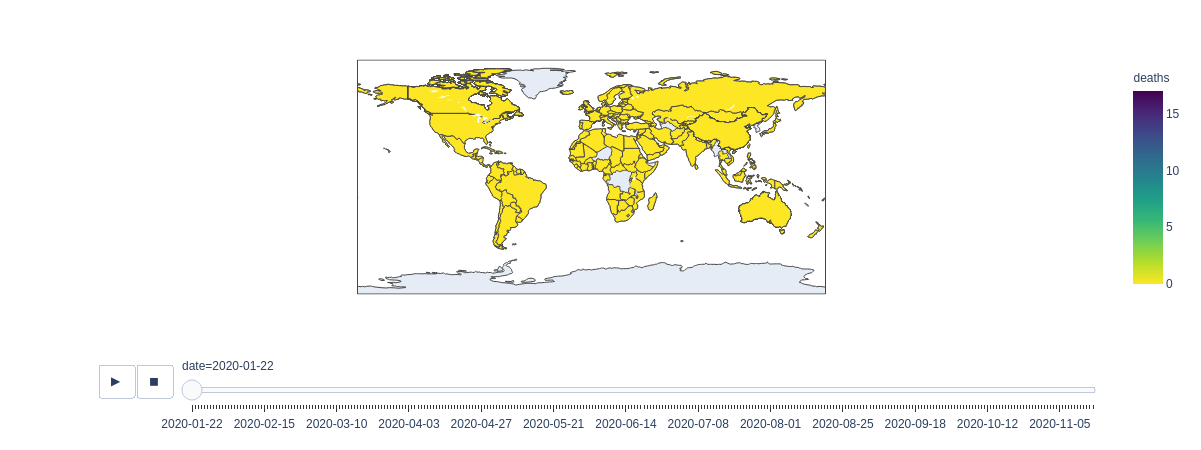

In [58]:
fig = px.choropleth(data_frame = df,
                    locations= "iso_alpha",
                    color= "deaths",
                    hover_name= "country",
                    color_continuous_scale=px.colors.sequential.Viridis_r,
                    animation_frame= "date")

fig.show()

## need to fix country names and change map size in layout 